In [13]:
import pickle
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
#Import feedback
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/tajta/OneDrive/Desktop/Happy_plus/Emotion_Analysis_nlp/text_emotion_dataset_v1_csv.csv',header =0)
df
#text_str=te

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
31322,"My sweetheart left me, or rather we decided to...",sadness
31323,"Well , it's too bad that we like different kin...",sadness
31324,It sure is .,neutral
31325,He â€™ s got laid off again . I do feel sorry ...,sadness


In [1]:
df.Emotion.value_counts()

NameError: name 'df' is not defined

In [57]:
##select emotions as joy,sadness,anger,neutral
df_1=df.loc[df['Emotion'].isin(['joy','sadness','anger','neutral'])]
df_1.head(10)
print(df_1.shape)

(24423, 2)


In [127]:
#Text length
df_1['Text_len'] = df_1['Text'].astype(str).apply(len)
print (df_1['Text_len'].describe())

count    24423.000000
mean        54.651558
std         37.825462
min          0.000000
25%         27.000000
50%         47.000000
75%         75.000000
max        637.000000
Name: Text_len, dtype: float64


<ipython-input-127-96b028e87b06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Text_len'] = df_1['Text'].astype(str).apply(len)


In [22]:
df_1.head(10)

,Text,Emotion,Text_len
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
4,i am feeling grouchy,anger,20
5,ive been feeling a little burdened lately wasn...,sadness,65
8,i have been with petronas for years i feel tha...,joy,98
10,i feel like i have to make the suffering i m s...,sadness,66
11,i do feel that running is a divine experience ...,joy,108
12,i think it s the easiest time of year to feel ...,anger,58
13,i feel low energy i m just thirsty,sadness,34


In [71]:
df_1['word_count'] = df_1['Text'].apply(lambda x: len(str(x).split()))
df_1.head(10)

<ipython-input-71-23c89bfbecf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['word_count'] = df_1['Text'].apply(lambda x: len(str(x).split()))


,Text,Emotion,Text_no_freq,Text_no_freq_norare,Text_all_clean,word_count
0,feel humiliated,sadness,humiliated,humiliated,humiliated,2
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...,hopeless damned hopeful around someone cares a...,9
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong,grabbing minute post greedy wrong,7
4,feeling grouchy,anger,grouchy,grouchy,grouchy,2
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure,ive burdened lately sure,6
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,9
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something,make suffering seeing mean something,7
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...,running divine experience expect type spiritua...,8
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied,easiest year dissatisfied,6
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty,low energy thirsty,4


In [18]:
#df_1.to_csv(r'C:/Users/tajta/OneDrive/Desktop/Happy_plus/Emotion_Analysis_nlp/venttext_word_count.csv', index = True)

In [128]:
print (df_1['word_count'].describe())

count    24423.000000
mean         6.764280
std          4.948684
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         89.000000
Name: word_count, dtype: float64


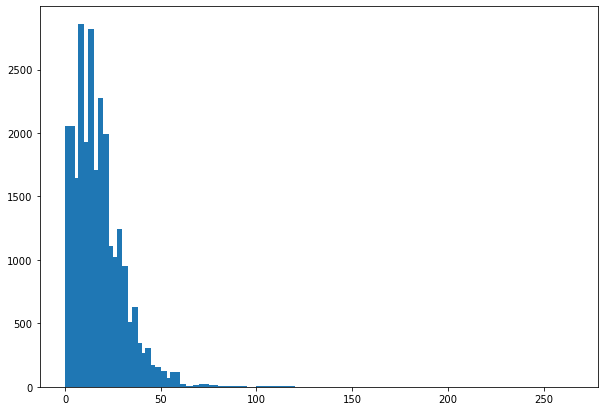

In [25]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_1['word_count'], bins = [0, 5,7,10,12,15,17 ,20,23, 25,27 ,30,33,35,38,40,42,45,47,50,53,55,60,63,65,67,70,75,80,85,90,95,100,120,140,160,180,200,210,220,230,240,260,265]) 
# Show plot 
plt.show() 

In [27]:
df_joy = df_1[df_1.Emotion == 'joy']
#print (df_joy['Text_len'].describe())
print (df_joy['word_count'].describe())

count    9087.000000
mean       18.971828
std        11.144029
min         1.000000
25%        11.000000
50%        17.000000
75%        25.000000
max       122.000000
Name: word_count, dtype: float64


In [28]:
df_sadness = df_1[df_1.Emotion == 'sadness']
df_sadness.shape
#print (df_sadness['Text_len'].describe())
print (df_sadness['word_count'].describe())

count    8114.000000
mean       18.384274
std        11.372105
min         2.000000
25%        10.000000
50%        16.000000
75%        25.000000
max       102.000000
Name: word_count, dtype: float64


In [29]:
df_neutral = df_1[df_1.Emotion == 'neutral']
print(df_neutral.shape)#print (df_neutral['Text_len'].describe())
print (df_neutral['word_count'].describe())

(2254, 4)
count    2254.000000
mean        7.129547
std         8.558671
min         1.000000
25%         2.000000
50%         3.000000
75%         9.000000
max       101.000000
Name: word_count, dtype: float64


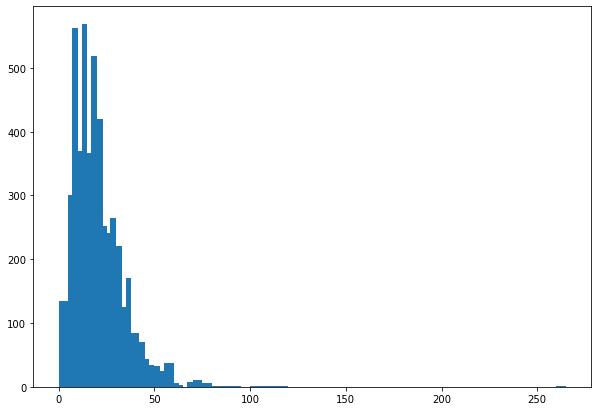

In [31]:
# Creating histogram 
df_anger = df_1[df_1.Emotion == 'anger']
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_anger['word_count'], bins = [0, 5,7,10,12,15,17 ,20,23, 25,27 ,30,33,35,38,40,42,45,47,50,53,55,60,63,65,67,70,75,80,85,90,95,100,120,140,160,180,200,210,220,230,240,260,265]) 
# Show plot 
plt.show() 

In [115]:
 def WCloud_FreqDist_Function_str_v1(data):       
        # Cleaning the texts
          #Clean the text
    import nltk
    import re
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    nltk.download('wordnet')
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import WordNetLemmatizer 
    lemmatizer = WordNetLemmatizer() 
    ps = PorterStemmer()
    #corpus = []
   
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', data)
    review = review.lower()
    review = review.split()
    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    stoplist = stopwords.words('english')
    more_stopwords = ['per','done','u','tmh','get','na','provide','as','atta','year','yearly','lettel',
                 'new','every','make','right','must','continue','continued','provide','provided','proper','given','must',
                 'continue','need','given','increase','required','better','plant','regular','like',
                 'also','n']    
    stoplist += more_stopwords
    #stoplist
    review = [lemmatizer.lemmatize(word) for word in review if not word in stoplist]
    #review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    #corpus.append(review)

    #List to String
    #corpus_listToStr = ' '.join([str(elem) for elem in corpus])
    #corpus_listToStr

    #NLTK frequency distribution
    from nltk import FreqDist
    words = review.split()
    #print(len(words))
    fdist1 = FreqDist(words)
    #filtered_word_freq = dict((word, freq) for word, freq in fdist1.items() if freq >35)
    #print(filtered_word_freq)
    return fdist1.most_common(100)
    #return fdist1


In [116]:
x=df_1['Text'].to_string()
x

'0                                    didnt feel humiliated\n1        go feeling hopeless damned hopeful around some...\n2                im grabbing minute post feel greedy wrong\n4                                          feeling grouchy\n5            ive feeling little burdened lately wasnt sure\n8        petronas year feel petronas performed well mad...\n10          feel like make suffering seeing mean something\n11       feel running divine experience expect type spi...\n12               think easiest time year feel dissatisfied\n13                                 feel low energy thirsty\n14                                                     NaN\n15                             feel reassured anxiety side\n16                           didnt really feel embarrassed\n17                               feel pretty pathetic time\n18       started feeling sentimental doll child began c...\n20       feel irritated rejected without anyone anythin...\n22                                feeli

In [117]:
WCloud_FreqDist_Function_str_v1(x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('feel', 8828),
 ('nan', 4088),
 ('feeling', 3805),
 ('im', 1780),
 ('really', 733),
 ('time', 659),
 ('know', 635),
 ('friend', 582),
 ('day', 477),
 ('one', 469),
 ('think', 462),
 ('want', 462),
 ('little', 449),
 ('would', 444),
 ('good', 397),
 ('much', 393),
 ('still', 387),
 ('people', 384),
 ('go', 383),
 ('ive', 365),
 ('got', 359),
 ('could', 348),
 ('see', 345),
 ('going', 343),
 ('thing', 339),
 ('felt', 339),
 ('love', 336),
 ('even', 328),
 ('pretty', 316),
 ('bit', 301),
 ('way', 299),
 ('sorry', 298),
 ('something', 287),
 ('life', 287),
 ('well', 282),
 ('today', 276),
 ('happy', 268),
 ('dont', 261),
 ('back', 258),
 ('always', 258),
 ('say', 257),
 ('work', 252),
 ('made', 237),
 ('first', 235),
 ('look', 233),
 ('sad', 232),
 ('sure', 225),
 ('come', 225),
 ('home', 212),
 ('help', 206),
 ('oh', 205),
 ('said', 200),
 ('last', 197),
 ('away', 196),
 ('quite', 196),
 ('someone', 194),
 ('cant', 193),
 ('never', 188),
 ('person', 188),
 ('left', 187),
 ('angry', 186)

In [36]:
x=df_joy['Text'].to_string()
x

'8        i have been with petronas for years i feel tha...\n11       i do feel that running is a divine experience ...\n14       i have immense sympathy with the general point...\n15         i do not feel reassured anxiety is on each side\n22         i have the feeling she was amused and delighted\n23       i was able to help chai lifeline with your sup...\n29       i feel more superior dead chicken or grieving ...\n30       i get giddy over feeling elegant in a perfectl...\n34       i can t imagine a real life scenario where i w...\n35       i am not sure what would make me feel content ...\n36             i have been feeling the need to be creative\n37       i do however want you to know that if somethin...\n39       i need you i need someone i need to be protect...\n40       i plan to share my everyday life stories trave...\n41       i already have my christmas trees up i got two...\n42       ive worn it once on its own with a little conc...\n43       i feel very strongly passionat

In [ ]:
WCloud_FreqDist_Function_str_v1(x)

In [37]:
x=df_sadness['Text'].to_string()
WCloud_FreqDist_Function_str_v1(x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


FreqDist({'feel': 3243, 'feeling': 1352, 'im': 652, 'know': 282, 'sorry': 264, 'really': 256, 'friend': 215, 'ive': 182, 'little': 180, 'sad': 175, ...})

In [38]:
x=df_neutral['Text'].to_string()
WCloud_FreqDist_Function_str_v1(x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


FreqDist({'yes': 158, 'see': 69, 'oh': 69, 'ok': 64, 'sure': 53, 'yeah': 46, 'think': 42, 'hi': 40, 'know': 37, 'well': 32, ...})

In [39]:
 def Word_cooccurmatrix_function(data):    
    #Clean the text
    import nltk
    import re
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    nltk.download('wordnet')
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import WordNetLemmatizer 
    lemmatizer = WordNetLemmatizer() 
    ps = PorterStemmer()
    corpus = []

        #print(i)
    review = re.sub('[^a-zA-Z]', ' ', data)
    review = review.lower()
    review = review.split()
    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    stoplist = stopwords.words('english')
    more_stopwords = ['per','done','u','tmh','get','na','provide','as','atta','year','yearly','lettel',
                     'new','every','make','right','must','continue','continued','provide','provided','proper','given','must',
                     'continue','need','given','increase','required','better','plant','regular','like',
                     'also']    
    stoplist += more_stopwords
    #stoplist
    review = [lemmatizer.lemmatize(word) for word in review if not word in stoplist]
    #review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    corpus_listToStr = ' '.join([str(elem) for elem in corpus])
    corpus_listToStr
    from nltk import FreqDist
    words = corpus_listToStr.split()
    from collections import Counter
    #bigrams = list(itertools.chain(*terms_bigram))
    from nltk import bigrams 

    terms_bigram = bigrams(words)
    #terms_bigram = [list(bigrams(corpus)) for tweet in tweets_nsw_nc]
    # Create counter of words in clean bigrams
    bigram_counts = collections.Counter(terms_bigram)

    return(bigram_counts.most_common(50))

In [40]:
import collections
x=df_anger['Text'].to_string()
Word_cooccurmatrix_function(x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(('im', 'feeling'), 142),
 (('feel', 'im'), 40),
 (('feel', 'really'), 31),
 (('feeling', 'little'), 31),
 (('feel', 'greedy'), 30),
 (('feel', 'resentful'), 30),
 (('feel', 'cold'), 28),
 (('feel', 'angry'), 28),
 (('feel', 'disgusted'), 27),
 (('feel', 'irritated'), 25),
 (('feel', 'little'), 25),
 (('feel', 'insulted'), 24),
 (('feel', 'offended'), 24),
 (('still', 'feel'), 23),
 (('friend', 'mine'), 23),
 (('feel', 'bit'), 22),
 (('feel', 'selfish'), 22),
 (('feel', 'frustrated'), 22),
 (('feel', 'fucked'), 21),
 (('feeling', 'cranky'), 21),
 (('feel', 'jealous'), 21),
 (('feel', 'feel'), 20),
 (('feel', 'bitter'), 20),
 (('feel', 'rude'), 20),
 (('feel', 'rushed'), 20),
 (('feel', 'dissatisfied'), 20),
 (('feel', 'petty'), 19),
 (('feel', 'hated'), 19),
 (('feel', 'tortured'), 18),
 (('feeling', 'bit'), 18),
 (('feel', 'agitated'), 18),
 (('one', 'day'), 18),
 (('feel', 'annoyed'), 17),
 (('feeling', 'really'), 16),
 (('b', 'feel'), 16),
 (('feel', 'violent'), 16),
 (('didnt', 'f

In [41]:
x=df_joy['Text'].to_string()
Word_cooccurmatrix_function(x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(('im', 'feeling'), 346),
 (('feel', 'im'), 70),
 (('feel', 'feel'), 63),
 (('feel', 'pretty'), 59),
 (('feeling', 'pretty'), 59),
 (('feel', 'really'), 50),
 (('feel', 'honored'), 44),
 (('still', 'feel'), 43),
 (('feeling', 'generous'), 40),
 (('could', 'feel'), 38),
 (('feel', 'privileged'), 38),
 (('feel', 'honoured'), 37),
 (('really', 'feel'), 37),
 (('feeling', 'quite'), 36),
 (('didnt', 'feel'), 36),
 (('feeling', 'feel'), 33),
 (('always', 'feel'), 33),
 (('feel', 'lucky'), 32),
 (('feel', 'little'), 32),
 (('feel', 'blessed'), 32),
 (('know', 'feel'), 31),
 (('im', 'sure'), 31),
 (('feel', 'much'), 31),
 (('want', 'feel'), 30),
 (('feel', 'safe'), 30),
 (('feel', 'glad'), 30),
 (('th', 'feel'), 30),
 (('feel', 'ive'), 29),
 (('feeling', 'little'), 29),
 (('feeling', 'really'), 29),
 (('feel', 'quite'), 28),
 (('day', 'feel'), 27),
 (('feel', 'super'), 27),
 (('help', 'feel'), 26),
 (('feel', 'satisfied'), 26),
 (('feel', 'free'), 26),
 (('feel', 'peaceful'), 26),
 (('feel', 

In [42]:
x=df_1['Text'].to_string()
l=WCloud_FreqDist_Function_str_v1(x)
l


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tajta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


FreqDist({'feel': 8502, 'feeling': 3470, 'im': 1700, 'know': 667, 'really': 659, 'friend': 567, 'think': 453, 'want': 427, 'time': 418, 'ive': 402, ...})

In [46]:
l['ive']

402

In [75]:
dict_value=dict((k, v) for k, v in l.items() if v <= 2)
dict_value


{'grabbing': 1,
 'petronas': 1,
 'easiest': 2,
 'thirsty': 2,
 'immense': 1,
 'chai': 1,
 'lifeline': 1,
 'grieving': 2,
 'perfectl': 1,
 'scenario': 1,
 'elderly': 2,
 'gentle': 1,
 'trave': 1,
 'conc': 1,
 'denmark': 2,
 'dough': 1,
 'spoiled': 2,
 'qaf': 1,
 'jacynthe': 1,
 'vig': 1,
 'bomb': 1,
 'ovary': 1,
 'mxm': 1,
 'nay': 2,
 'impor': 2,
 'firey': 1,
 'leanne': 1,
 'dannika': 1,
 'stran': 1,
 'animosity': 1,
 'towar': 1,
 'throwing': 1,
 'wryly': 1,
 'banal': 1,
 'cryi': 1,
 'alba': 1,
 'obtain': 1,
 'overwh': 1,
 'ratty': 1,
 'alri': 1,
 'devast': 1,
 'pumpkin': 1,
 'spice': 1,
 'latte': 1,
 'clench': 1,
 'fami': 2,
 'wash': 2,
 'slee': 1,
 'bloging': 1,
 'associated': 2,
 'bitterly': 2,
 'genre': 2,
 'disservice': 2,
 'whimper': 1,
 'fant': 2,
 'direc': 2,
 'influenced': 1,
 'dash': 1,
 'fatter': 1,
 'claim': 2,
 'redeem': 1,
 'distra': 1,
 'youtube': 2,
 'punishe': 2,
 'flying': 2,
 'revise': 1,
 'alex': 2,
 'educating': 1,
 'fragra': 1,
 'maligned': 1,
 'hilarious': 1,
 'ge

In [ ]:
df_fdist = pd.DataFrame.from_dict(l, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist

In [ ]:
df_fdist.to_csv(r'C:/Users/tajta/OneDrive/Desktop/Happy_plus/\Emotion_Analysis_nlp/Term_frequency.csv', index = True)

In [ ]:
### Data Cleaning 

In [57]:
#Remove standard stopwords
#remove custom stopwords
#remove words with freq <=2(a,h,b....)
#remove a to z single alphabet
#remove not meaningfull words whose length 1/2/3




In [ ]:
Lower casing
Removal of Punctuations
Removal of Stopwords
Removal of Frequent words
Removal of Rare words
Stemming
Lemmatization
Removal of emojis
Removal of emoticons
Conversion of emoticons to words
Conversion of emojis to words
Removal of URLs
Removal of HTML tags

In [10]:
import numpy as np
import pandas as pd
import re
import nltk
#import spacy
import string

In [41]:
df_1.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
8,i have been with petronas for years i feel tha...,joy
10,i feel like i have to make the suffering i m s...,sadness
11,i do feel that running is a divine experience ...,joy
12,i think it s the easiest time of year to feel ...,anger
13,i feel low energy i m just thirsty,sadness


In [72]:
#To lower case
df_1["Text"] = df_1["Text"].str.lower()
df_1.head(10)

<ipython-input-72-f5c5641eda0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Text"] = df_1["Text"].str.lower()


,Text,Emotion,Text_no_freq,Text_no_freq_norare,Text_all_clean,word_count
0,feel humiliated,sadness,humiliated,humiliated,humiliated,2
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...,hopeless damned hopeful around someone cares a...,9
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong,grabbing minute post greedy wrong,7
4,feeling grouchy,anger,grouchy,grouchy,grouchy,2
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure,ive burdened lately sure,6
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,9
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something,make suffering seeing mean something,7
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...,running divine experience expect type spiritua...,8
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied,easiest year dissatisfied,6
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty,low energy thirsty,4


In [73]:
##Remove punctuation
df_1['Text'] = df_1['Text'].str.replace('[^\w\s]',' ')
df_1.head(10)

<ipython-input-73-95e787e51836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Text'] = df_1['Text'].str.replace('[^\w\s]',' ')


,Text,Emotion,Text_no_freq,Text_no_freq_norare,Text_all_clean,word_count
0,feel humiliated,sadness,humiliated,humiliated,humiliated,2
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...,hopeless damned hopeful around someone cares a...,9
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong,grabbing minute post greedy wrong,7
4,feeling grouchy,anger,grouchy,grouchy,grouchy,2
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure,ive burdened lately sure,6
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,9
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something,make suffering seeing mean something,7
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...,running divine experience expect type spiritua...,8
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied,easiest year dissatisfied,6
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty,low energy thirsty,4


In [74]:
##Remove stopwords
from nltk.corpus import stopwords
more_stopwords = ['its','arent',"couldnt","didnt","doesnt","hadnt","hasnt","havent","isnt","mightnt","mustnt","neednt",
 "shant","shouldnt","wasnt","werent","wont",'wouldnt']    
stop = stopwords.words('english')
stop += more_stopwords
df_1['Text'] = df_1['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_1.head(15)


<ipython-input-74-4473ecb08c54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Text'] = df_1['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


,Text,Emotion,Text_no_freq,Text_no_freq_norare,Text_all_clean,word_count
0,feel humiliated,sadness,humiliated,humiliated,humiliated,2
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...,hopeless damned hopeful around someone cares a...,9
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong,grabbing minute post greedy wrong,7
4,feeling grouchy,anger,grouchy,grouchy,grouchy,2
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure,ive burdened lately sure,6
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,9
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something,make suffering seeing mean something,7
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...,running divine experience expect type spiritua...,8
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied,easiest year dissatisfied,6
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty,low energy thirsty,4


In [75]:
##Remove frequent and rare words
from collections import Counter
cnt = Counter()
for text in df_1["Text"]:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('feel', 10998),
 ('feeling', 4894),
 ('like', 3095),
 ('im', 2308),
 ('time', 1233),
 ('really', 1150),
 ('know', 1066),
 ('get', 984),
 ('one', 963),
 ('would', 894),
 ('people', 797),
 ('think', 740),
 ('want', 736),
 ('good', 707),
 ('little', 701),
 ('â', 690),
 ('much', 686),
 ('even', 679),
 ('day', 677),
 ('could', 674)]

In [76]:
##Remove frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df_1["Text_no_freq"] = df_1["Text"].apply(lambda text: remove_freqwords(text))
df_1.head(10)

<ipython-input-76-9e68f844baec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Text_no_freq"] = df_1["Text"].apply(lambda text: remove_freqwords(text))


,Text,Emotion,Text_no_freq,Text_no_freq_norare,Text_all_clean,word_count
0,feel humiliated,sadness,humiliated,humiliated,humiliated,2
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...,hopeless damned hopeful around someone cares a...,9
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong,grabbing minute post greedy wrong,7
4,feeling grouchy,anger,grouchy,grouchy,grouchy,2
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure,ive burdened lately sure,6
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,9
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something,make suffering seeing mean something,7
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...,running divine experience expect type spiritua...,8
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied,easiest year dissatisfied,6
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty,low energy thirsty,4


In [63]:
##Remove rare words
n_rare_words = 500
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df_1["Text_no_freq_norare"] = df_1["Text_no_freq"].apply(lambda text: remove_rarewords(text))
df_1.head(20)

<ipython-input-63-799deb95b47a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Text_no_freq_norare"] = df_1["Text_no_freq"].apply(lambda text: remove_rarewords(text))


,Text,Emotion,Text_no_freq,Text_no_freq_norare
0,feel humiliated,sadness,humiliated,humiliated
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong
4,feeling grouchy,anger,grouchy,grouchy
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty


In [77]:
##Length of words > 2 for meaningfull words
def words_3(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if len(word) > 2])
df_1["Text_all_clean"] = df_1["Text_no_freq_norare"].apply(lambda text: words_3(text))
df_1.head(20)

<ipython-input-77-a5fedbcc9d4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Text_all_clean"] = df_1["Text_no_freq_norare"].apply(lambda text: words_3(text))


,Text,Emotion,Text_no_freq,Text_no_freq_norare,Text_all_clean,word_count
0,feel humiliated,sadness,humiliated,humiliated,humiliated,2
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...,hopeless damned hopeful around someone cares a...,9
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong,grabbing minute post greedy wrong,7
4,feeling grouchy,anger,grouchy,grouchy,grouchy,2
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure,ive burdened lately sure,6
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,9
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something,make suffering seeing mean something,7
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...,running divine experience expect type spiritua...,8
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied,easiest year dissatisfied,6
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty,low energy thirsty,4


In [78]:
##Length of words > 2 for meaningfull words test
words_3('hi how saddy you are happy logginig is c & a')

'how saddy you are happy logginig'

In [79]:
df_1['word_count'] = df_1['Text_all_clean'].apply(lambda x: len(str(x).split()))
print(df_1.word_count.describe())
df_1.head(10)

count    24423.000000
mean         6.764280
std          4.948684
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         89.000000
Name: word_count, dtype: float64


<ipython-input-79-0718240e4d07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['word_count'] = df_1['Text_all_clean'].apply(lambda x: len(str(x).split()))


,Text,Emotion,Text_no_freq,Text_no_freq_norare,Text_all_clean,word_count
0,feel humiliated,sadness,humiliated,humiliated,humiliated,1
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...,hopeless damned hopeful around someone cares a...,7
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong,grabbing minute post greedy wrong,5
4,feeling grouchy,anger,grouchy,grouchy,grouchy,1
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure,ive burdened lately sure,4
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,8
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something,make suffering seeing mean something,5
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...,running divine experience expect type spiritua...,7
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied,easiest year dissatisfied,3
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty,low energy thirsty,3


In [80]:
#word count>0
df_data=df_1[df_1.word_count > 0]
df_data.head(10)

,Text,Emotion,Text_no_freq,Text_no_freq_norare,Text_all_clean,word_count
0,feel humiliated,sadness,humiliated,humiliated,humiliated,1
1,go feeling hopeless damned hopeful around some...,sadness,go hopeless damned hopeful around someone care...,go hopeless damned hopeful around someone care...,hopeless damned hopeful around someone cares a...,7
2,im grabbing minute post feel greedy wrong,anger,grabbing minute post greedy wrong,grabbing minute post greedy wrong,grabbing minute post greedy wrong,5
4,feeling grouchy,anger,grouchy,grouchy,grouchy,1
5,ive feeling little burdened lately sure,sadness,ive burdened lately sure,ive burdened lately sure,ive burdened lately sure,4
8,petronas years feel petronas performed well ma...,joy,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,petronas years petronas performed well made hu...,8
10,feel like make suffering seeing mean something,sadness,make suffering seeing mean something,make suffering seeing mean something,make suffering seeing mean something,5
11,feel running divine experience expect type spi...,joy,running divine experience expect type spiritua...,running divine experience expect type spiritua...,running divine experience expect type spiritua...,7
12,think easiest time year feel dissatisfied,anger,easiest year dissatisfied,easiest year dissatisfied,easiest year dissatisfied,3
13,feel low energy thirsty,sadness,low energy thirsty,low energy thirsty,low energy thirsty,3


In [81]:
df_clean_data = df_data[['Text_all_clean', 'Emotion','word_count']]

In [82]:
df_clean_data.head(10)

,Text_all_clean,Emotion,word_count
0,humiliated,sadness,1
1,hopeless damned hopeful around someone cares a...,sadness,7
2,grabbing minute post greedy wrong,anger,5
4,grouchy,anger,1
5,ive burdened lately sure,sadness,4
8,petronas years petronas performed well made hu...,joy,8
10,make suffering seeing mean something,sadness,5
11,running divine experience expect type spiritua...,joy,7
12,easiest year dissatisfied,anger,3
13,low energy thirsty,sadness,3


In [62]:
##Final data
#df_clean_data.to_csv(r'C:/Users/tajta/OneDrive/Desktop/Happy_plus/Emotion_Analysis_nlp/df_clean_data_final.csv', index = False)

In [17]:
##Stemming
import nltk
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_clean_data["Text_stemmed"] = df_clean_data["Text_all_clean"].apply(lambda text: stem_words(text))
df_clean_data.head()

<ipython-input-17-bba35d383cc6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_data["Text_stemmed"] = df_clean_data["Text_all_clean"].apply(lambda text: stem_words(text))


,Text_all_clean,Emotion,word_count,Text_stemmed
0,humiliated,sadness,1,humili
1,hopeless damned hopeful around someone cares a...,sadness,7,hopeless damn hope around someon care awak
2,grabbing minute post greedy wrong,anger,5,grab minut post greedi wrong
4,grouchy,anger,1,grouchi
5,ive burdened lately sure,sadness,4,ive burden late sure


In [83]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_clean_data["Text_lemmatized"] = df_clean_data["Text_all_clean"].apply(lambda text: lemmatize_words(text))
df_clean_data.head()

<ipython-input-83-fa324acce9c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_data["Text_lemmatized"] = df_clean_data["Text_all_clean"].apply(lambda text: lemmatize_words(text))


,Text_all_clean,Emotion,word_count,Text_lemmatized
0,humiliated,sadness,1,humiliated
1,hopeless damned hopeful around someone cares a...,sadness,7,hopeless damned hopeful around someone care awake
2,grabbing minute post greedy wrong,anger,5,grabbing minute post greedy wrong
4,grouchy,anger,1,grouchy
5,ive burdened lately sure,sadness,4,ive burdened lately sure


In [19]:
##SElect joy,sadness and anger
df_clean_final= df_clean_data[df_clean_data.Emotion != 'neutral']
df_clean_final.head(10)

,Text_all_clean,Emotion,word_count,Text_stemmed,Text_lemmatized
0,humiliated,sadness,1,humili,humiliated
1,hopeless damned hopeful around someone cares a...,sadness,7,hopeless damn hope around someon care awak,hopeless damned hopeful around someone care awake
2,grabbing minute post greedy wrong,anger,5,grab minut post greedi wrong,grabbing minute post greedy wrong
4,grouchy,anger,1,grouchi,grouchy
5,ive burdened lately sure,sadness,4,ive burden late sure,ive burdened lately sure
8,petronas years petronas performed well made hu...,joy,8,petrona year petrona perform well made huge pr...,petronas year petronas performed well made hug...
10,make suffering seeing mean something,sadness,5,make suffer see mean someth,make suffering seeing mean something
11,running divine experience expect type spiritua...,joy,7,run divin experi expect type spiritu encount,running divine experience expect type spiritua...
12,easiest year dissatisfied,anger,3,easiest year dissatisfi,easiest year dissatisfied
13,low energy thirsty,sadness,3,low energi thirsti,low energy thirsty


In [84]:
###Encoding output labels
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_clean_final['label_enc'] = labelencoder.fit_transform(df_clean_final['Emotion'])
df_clean_final[['Emotion','label_enc']].drop_duplicates(keep='first')

,Emotion,label_enc
0,sadness,2
2,anger,0
8,joy,1


In [ ]:
#sadness 2
#anger 0
#joy 1

In [85]:
df_clean_final.head(5)


,Text_all_clean,Emotion,word_count,Text_stemmed,Text_lemmatized,label_enc
0,humiliated,sadness,1,humili,humiliated,2
1,hopeless damned hopeful around someone cares a...,sadness,7,hopeless damn hope around someon care awak,hopeless damned hopeful around someone care awake,2
2,grabbing minute post greedy wrong,anger,5,grab minut post greedi wrong,grabbing minute post greedy wrong,0
4,grouchy,anger,1,grouchi,grouchy,0
5,ive burdened lately sure,sadness,4,ive burden late sure,ive burdened lately sure,2


In [86]:
df_clean_final.shape

(22116, 6)

In [35]:
#df_final_3_25=df_1[(df_1.word_count  >= 3) & (df_1.word_count<=25)] 

In [87]:
df_clean_final.Emotion.value_counts()

joy        9063
sadness    8103
anger      4950
Name: Emotion, dtype: int64

In [88]:
# Splitting into training and testing data in 80:20 ratio
y=df_clean_final['label_enc']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_clean_final.Text_stemmed.values, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [77]:
X_train

array(['pleasantli mellow regardless',
       'three week ago friend mine bid bye go abroad felt happi achiev someth make trip also felt sad see long',
       'ye wife come', ..., 'moment imagin therel someth vigor activ',
       'receiv report card afraid obtain low mark higher expect',
       'often resent anyth seem'], dtype=object)

In [78]:
df_clean_final.Text_stemmed.values

array(['humili', 'hopeless damn hope around someon care awak',
       'grab minut post greedi wrong', ...,
       'well bad differ kind movi mayb differ kind', 'got laid sorri',
       'stupid push rush citi'], dtype=object)

In [89]:
y_train.value_counts()

1    7250
2    6482
0    3960
Name: label_enc, dtype: int64

In [90]:
y_val.value_counts()

1    1813
2    1621
0     990
Name: label_enc, dtype: int64

In [ ]:
##Count Vector Approach:This is another feature we consider and as the name suggests we transform our data into an array having the count of appearances of each word in it.
#The intuition here is that the text that conveys similar emotions may have the same words repeated over and over again.

In [114]:
# Extracting Count Vectors Parameters
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df_clean_final['Text_stemmed'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

In [115]:
# Model 1: Multinomial Naive Bayes Classifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_val_count)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))

naive bayes count vectors accuracy 0.8410940325497287


In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[ 699,  130,  161],
       [  58, 1620,  135],
       [  85,  134, 1402]], dtype=int64)

In [ ]:
def remove_stopwords(text):
        """custom function to remove the stop words"""
    return " ".join([word for word in str(text).split() if word not in stop])

In [119]:
# Splitting into training and testing data in 80:20 ratio
y=df_clean_final['label_enc']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_clean_final.Text_lemmatized.values, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [120]:
# Extracting Count Vectors Parameters
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df_clean_final['Text_lemmatized'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

In [121]:
# Model 1: Multinomial Naive Bayes Classifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
nb_lemma = MultinomialNB()
nb_lemma.fit(X_train_count, y_train)
y_pred = nb_lemma.predict(X_val_count)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))

naive bayes count vectors accuracy 0.8587251356238698


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[ 391,  316,  283],
       [  64, 1462,  287],
       [  71,  446, 1104]], dtype=int64)

In [ ]:
import pickle
filename = 'nb_lemma_model.sav'

pickle.dump(model, open(filename, 'wb'))
 


In [122]:
import pickle
pickle.dump(count_vect, open('count_vect', 'wb'))

In [123]:
# load the model from disk
filename = 'nb_lemma_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test_d)
result

array([1])

In [7]:
stop_freq_rare_words=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'its',
 'arent',
 'couldnt',
 'didnt',
 'doesnt',
 'hadnt',
 'hasnt',
 'havent',
 'isnt',
 'mightnt',
 'mustnt',
 'neednt',
 'shant',
 'shouldnt',
 'wasnt',
 'werent',
 'wont',
 'wouldnt',
'could',
 'day',
 'even',
 'feel',
 'feeling',
 'get',
 'good',
 'im',
 'know',
 'like',
 'little',
 'much',
 'one',
 'people',
 'really',
 'think',
 'time',
 'want',
 'would',
 'â',
'1564',
 '1977',
 '1979',
 '1986',
 '1999',
 '19th',
 '1bs',
 '2a',
 '2c',
 '48',
 '49er',
 '512',
 '5b',
 '800',
 'abjectly',
 'absurdly',
 'abut',
 'accord',
 'accouting',
 'acute',
 'adheres',
 'admiral',
 'advantages',
 'aires',
 'alcool',
 'aldridge',
 'alecia',
 'alleging',
 'almanach',
 'amelia',
 'amends',
 'anc',
 'ans',
 'apoplectic',
 'appeard',
 'appliances',
 'approve',
 'armoury',
 'arnhem',
 'arpeggios',
 'asap',
 'assassination',
 'atlas',
 'atrocity',
 'attained',
 'aviator',
 'avoids',
 'baggage',
 'balcony',
 'balista',
 'bandaged',
 'bargaining',
 'bark',
 'barked',
 'barley',
 'basses',
 'bates',
 'baving',
 'bbs',
 'bennett',
 'bernard',
 'bildt',
 'blackboard',
 'blyton',
 'boal',
 'boast',
 'bowled',
 'brabham',
 'breach',
 'bubbled',
 'buenos',
 'burglary',
 'burial',
 'burun',
 'businessman',
 'caesarean',
 'calligraphy',
 'cannel',
 'carlie',
 'carrier',
 'casey',
 'catalog',
 'cecilia',
 'certifications',
 'chancellor',
 'channels',
 'characterize',
 'charlotte',
 'chico',
 'chilly',
 'choral',
 'clashfern',
 'commemorations',
 'companions',
 'compress',
 'comrades',
 'concert5',
 'contents',
 'contraceptives',
 'convoked',
 'cooke',
 'cooperate',
 'copland',
 'corruption',
 'coziness',
 'crocheting',
 'crumpled',
 'cueing',
 'curt',
 'dame',
 'dannielsson',
 'dedication',
 'deficiency',
 'delaying',
 'delegates',
 'deliberate',
 'demanded',
 'denning',
 'dented',
 'deputies',
 'deriving',
 'designs',
 'dido',
 'diificult',
 'diminished',
 'disadvantageous',
 'disadvantages',
 'disapproval',
 'disciplined',
 'disclosed',
 'disconsolation',
 'discontinue',
 'disgrace',
 'disguise',
 'dispenses',
 'dissolution',
 'documentay',
 'doings',
 'doleful',
 'domination',
 'dormer',
 'drafted',
 'drains',
 'draught',
 'drin',
 'duan',
 'duplication',
 'dwyer',
 'easing',
 'edwards',
 'elephant',
 'ere',
 'evacuate',
 'exaltation',
 'expectancy',
 'explosion',
 'expulsion',
 'extension',
 'extracurricular',
 'faintly',
 'fajita',
 'fanfare',
 'fase',
 'favours',
 'feathers',
 'federation',
 'fencing',
 'fined',
 'fingered',
 'finisher',
 'fittest',
 'fizzled',
 'flattens',
 'flaubert',
 'flicker',
 'flier',
 'foh',
 'fondness',
 'formerly',
 'formi',
 'forrest',
 'foursome',
 'francs',
 'frat',
 'fretting',
 'fried',
 'frump',
 'gagged',
 'gains',
 'girona',
 'globe',
 'glossary',
 'goalkeeper',
 'gothic',
 'gracefully',
 'graduatiion',
 'graves',
 'grinning',
 'guatemala',
 'guided',
 'gunslinger',
 'hale',
 'hallway',
 'halted',
 'hamburg',
 'hauling',
 'hauser',
 'heartily',
 'hewson',
 'highbury',
 'hindrances',
 'honduran',
 'honduras',
 'honeymoon',
 'hoops',
 'horrendous',
 'horseback',
 'hrt',
 'hunter',
 'hurriedly',
 'hygienic',
 'hyperactive',
 'ignores',
 'imagines',
 'impertinence',
 'imploded',
 'incense',
 'indenbaum',
 'indentures',
 'indoors',
 'inefficiency',
 'infinite',
 'informative',
 'inspect',
 'instace',
 'institutions',
 'interferred',
 'internalised',
 'intolerance',
 'invigorate',
 'issued',
 'jaguar',
 'johns',
 'judgements',
 'jumbe',
 'k100',
 'k30',
 'kabwe',
 'kittens',
 'landslides',
 'lanscape',
 'laryngeal',
 'lawson',
 'letterbox',
 'levelled',
 'liberties',
 'litre',
 'liverpool',
 'livingston',
 'loading',
 'lottery',
 'lovesickness',
 'lumbered',
 'lyn',
 'lynching',
 'mackay',
 'macon',
 'malevolent',
 'maneuver',
 'manipulation',
 'marguerite',
 'materialize',
 'materializing',
 'mauritania',
 'mchesi',
 'melndez',
 'menstration',
 'messier',
 'methodic',
 'mick',
 'minorca',
 'mit',
 'mockery',
 'monopolise',
 'monotony',
 'morrison',
 'mosquitoes',
 'mot',
 'myths',
 'nearest',
 'nh',
 'noncommercial',
 'nonsens',
 'nothingness',
 'obviusly',
 'occurence',
 'ohhhh',
 'operator',
 'oppression',
 'orally',
 'outstrips',
 'overflowed',
 'overheard',
 'overtaking',
 'oviedo',
 'pa',
 'packets',
 'paedophiliac',
 'painfully',
 'painkillers',
 'pallid',
 'palpable',
 'panama',
 'passsed',
 'payment',
 'pedal',
 'penguin',
 'penultimate',
 'persecution',
 'perspiration',
 'perversely',
 'piggy',
 'pillars',
 'pingpong',
 'pithched',
 'pitman',
 'plummer',
 'plychology',
 'policies',
 'popularity',
 'portrait',
 'portraying',
 'postman',
 'prefecture',
 'prejudices',
 'prescriptions',
 'professions',
 'programmers',
 'prompted',
 'prosecutors',
 'psychical',
 'publican',
 'pullovers',
 'punish',
 'pyke',
 'queue',
 'queuing',
 'ralemberg',
 'raquel',
 'rebate',
 'rebel',
 'rebuilt',
 'recommendation',
 'reconsider',
 'recreating',
 'recurrent',
 'refereeing',
 'refilling',
 'rejoicing',
 'relayed',
 'reminiscent',
 'reminiscing',
 'rents',
 'repaired',
 'repel',
 'repentance',
 'reschedule',
 'rescued',
 'resolutely',
 'retreating',
 'reversed',
 'ridged',
 'robbery',
 'robe',
 'robson',
 'rooftop',
 'rosebery',
 'rosenbloom',
 'rosie',
 'rover',
 'ruffians',
 'ruptured',
 'sarajevo',
 'scleral',
 'sections',
 'seing',
 'seismic',
 'senate',
 'serbs',
 'sergeant',
 'seriors',
 'shadowed',
 'shaked',
 'sharpness',
 'shelley',
 'shirer',
 'shrunk',
 'sighing',
 'sixteenth',
 'skydide',
 'slattern',
 'slighty',
 'slimiy',
 'slurs',
 'soemone',
 'softened',
 'solist',
 'soporification',
 'sotheby',
 'spat',
 'specifying',
 'squaddies',
 'squadron',
 'sterilized',
 'stretcher',
 'strived',
 'striven',
 'stronghold',
 'stubbled',
 'sty',
 'subordinate',
 'succession',
 'summoned',
 'suzannah',
 'switchboard',
 'switching',
 'swooped',
 'sybil',
 'taciturnity',
 'tackels',
 'tage',
 'taipei',
 'tanzania',
 'tapering',
 'tara',
 'taxing',
 'telegrams',
 'tentative',
 'tertiary',
 'thay',
 'theoretical',
 'therein',
 'thorns',
 'thourgh',
 'threefold',
 'titan',
 'toothbrush',
 'toppling',
 'towelling',
 'trailing',
 'trance',
 'tranquilliser',
 'transiently',
 'travels',
 'traying',
 'trek',
 'triangular',
 'tributes',
 'tricameral',
 'trumpeted',
 'tsu',
 'tutors',
 'tyrol',
 'ummmph',
 'unaccustomed',
 'unbent',
 'unconditionally',
 'uncontrollably',
 'undamaged',
 'undefeated',
 'underestimate',
 'underfoot',
 'underscore',
 'undescribable',
 'unequivocally',
 'unfolds',
 'unimpartiality',
 'unrestrained',
 'untouchable',
 'vacate',
 'valds',
 'vass',
 'ventilates',
 'vicky',
 'vigour',
 'vincent',
 'violins',
 'volcanoes',
 'warrington',
 'wearily',
 'wears',
 'welshpool',
 'wheels',
 'wikstrã',
 'winnings',
 'wok',
 'wrinkled',
 'zealous',
 'zhang',
 'zhongshan']

                      

In [97]:
stop_freq_rare_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [98]:
def stop_freq_rare_words_f(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in stop_freq_rare_words])

In [99]:
stop_freq_rare_words_f('hi how are you taj')

'hi taj'

In [28]:
# Extracting TF-IDF parameters
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)
from sklearn.metrics import accuracy_score
# Model 1: Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb_lemma_tfidf = MultinomialNB()
nb_lemma_tfidf.fit(X_train_tfidf, y_train)
y_pred = nb_lemma_tfidf.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))

naive bayes tfidf accuracy 0.41139240506329117


In [45]:
##test data
def emotion_detect_function(text):
    #test_data='i am very much angry today taj'
    test_data = str.lower(text)
    print(test_data)
    test_data_1 =re.sub('[^a-zA-Z]', ' ', test_data)
    #print(test_data_1)
    def stop_freq_rare_words_f(text):
        return " ".join([word for word in str(text).split() if word not in stop_freq_rare_words])
    test_data_2=stop_freq_rare_words_f(test_data_1)
    def lemmatize_words(text):
        return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    test_data_2=lemmatize_words(test_data_2)
    #print(test_data_2)
    #def stem_words(text):
        #return " ".join([stemmer.stem(word) for word in text.split()])
    #test_data_2=stem_words(test_data_2)
    test_data_2=pd.DataFrame([test_data_2])
    #count_vect = CountVectorizer(analyzer='word')
    filename = 'count_vect'
    count_vect=pickle.load(open(filename, 'rb'))
    test_data_count=count_vect.transform(test_data_2[0])
    # load the model from disk
    filename = 'nb_lemma_model.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.predict(test_data_count)
    value = list(loaded_model.predict_proba(test_data_count).max(axis=1))
    key = "Anger" if result==0 else "Joy" if result==1 else "Sadness"
    return key,value


In [49]:
#from sklearn.feature_extraction.text import CountVectorizer
y=emotion_detect_function('i am very much angry today taj')
y

i am very much angry today taj


('Anger', [0.7382996788365458])

In [51]:
y[1]

[0.7382996788365458]

In [47]:
emotion_detect_function('I am very happy today! The atmosphere looks cheerful')

i am very happy today! the atmosphere looks cheerful


('Joy', [0.9331665451752243])

In [ ]:
sadness	3
anger	0
joy	1


In [48]:
emotion_detect_function('i am very much frustrated with your behaviour')

i am very much frustrated with your behaviour


('Anger', [0.7970289196983199])

In [52]:
res = emotion_detect_function('i am very much frustrated with your behaviour')
key, value = res[0],res[1]

i am very much frustrated with your behaviour


In [53]:
res[0],res[1]

('Anger', [0.7970289196983199])